In [34]:
import numpy as np
import pandas as pd
import pickle
import procrustes
from matplotlib.animation import FFMpegWriter
import cv2 
from math import atan2
from scipy import ndimage
import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import liftpose.plot as plot
import yaml

home_dir = '/data/LiftPose3D/fly_prism/'
data_dir = '/mnt/NAS/SG/prism_data/'

border_width = 105
threshold = 45
bbox_width = 550
horiz_crop = 440

In [35]:
crop_positions = ['/bottom_view/videos/crop_loc_191125_PR_Fly1_001_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_002_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_003_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_004_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_001_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_002_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_003_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_004_prism.txt']

im_full = ['191125_PR/Fly1/001_prism/behData/images/',
           '191125_PR/Fly1/002_prism/behData/images/',
           '191125_PR/Fly1/003_prism/behData/images/',
           '191125_PR/Fly1/004_prism/behData/images/',
           '191125_PR/Fly2/001_prism/behData/images/',
           '191125_PR/Fly2/002_prism/behData/images/',
           '191125_PR/Fly2/003_prism/behData/images/',
           '191125_PR/Fly2/004_prism/behData/images/']

images_side = ['191125_PR/Fly1/001_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/002_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/003_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/004_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly2/001_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/002_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/003_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/004_prism/behData/images/side_view_prism_data_191125_PR_Fly2/']

images_bottom =  ['191125_PR/Fly1/001_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/002_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/003_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/004_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly2/001_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/002_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/003_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/004_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/']

DLC_predictions = ['191125_PR_Fly1_001_prism.pkl',
                  '191125_PR_Fly1_002_prism.pkl',
                  '191125_PR_Fly1_003_prism.pkl',
                  '191125_PR_Fly1_004_prism.pkl',
                  '191125_PR_Fly2_001_prism.pkl',
                  '191125_PR_Fly2_002_prism.pkl',
                  '191125_PR_Fly2_003_prism.pkl',
                  '191125_PR_Fly2_004_prism.pkl']

In [36]:
#load DLC predictions
which = 2
poses = pickle.load(open(home_dir + 'data_unoriented/' + DLC_predictions[which], 'rb'))
im_file, x_pos = procrustes.read_crop_pos(home_dir + crop_positions[which])
index = poses['index']
good_keypts = poses['good_keypts']
par_data = yaml.full_load(open('../param.yaml', "rb"))

In [29]:
len(index)

5184

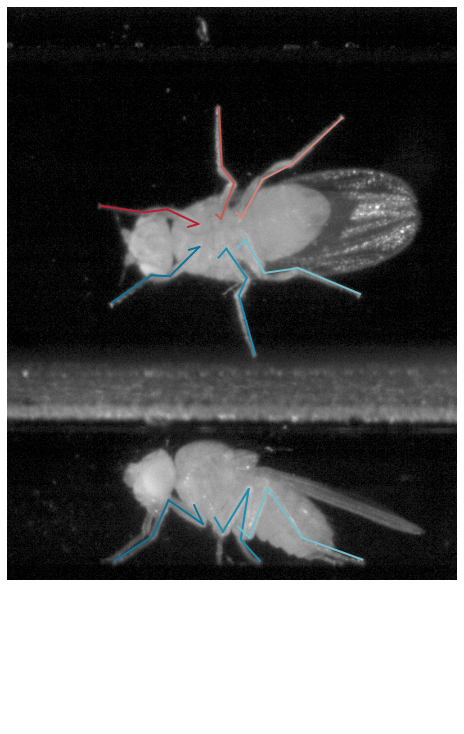

In [30]:
#cropped image
i = 0

bottom = poses['points2d'][0,i,:,:]
side = poses['points2d'][1,i,:,:]

im_crop_bottom = cv2.imread(data_dir + images_bottom[which] + im_file[index[i]],cv2.IMREAD_GRAYSCALE)
im_crop_side = cv2.imread(data_dir + images_side[which] + im_file[index[i]],cv2.IMREAD_GRAYSCALE)

f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(20,10))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

ax1.imshow(im_crop_bottom,cmap='gray', vmin=0, vmax=255)
ax2.imshow(im_crop_side,cmap='gray', vmin=0, vmax=255)
ax1.set_axis_off()
ax2.set_axis_off()

plot.plot_pose_2d(
    ax1, 
    bottom, 
    bones=par_data["vis"]["bones"], 
    limb_id=par_data["vis"]["limb_id"], 
    colors=par_data["vis"]["colors"],
    normalize=False, 
    good_keypts=None
)

plot.plot_pose_2d(
    ax2, 
    side, 
    bones=par_data["vis"]["bones"], 
    limb_id=par_data["vis"]["limb_id"], 
    colors=par_data["vis"]["colors"],
    normalize=False, 
    good_keypts=good_keypts[i,:]
)

#plt.savefig('DLC_pred.svg')

Full video

100%|██████████| 400/400 [00:34<00:00, 11.60it/s]


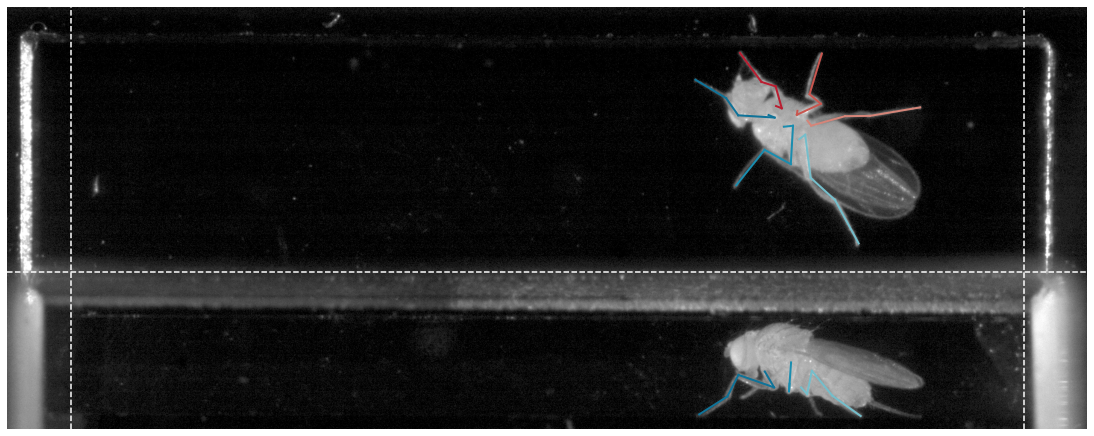

In [39]:
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

bottom = poses['points2d'][0,:,:,:]
bottom = np.reshape(bottom, (bottom.shape[0], bottom.shape[1]*bottom.shape[2]))
side = poses['points2d'][1,:,:,:]
side = np.reshape(side, (side.shape[0], side.shape[1]*side.shape[2]))
            
writer = FFMpegWriter(fps=10)
with writer.saving(fig, "DLC_prediction.mp4", 50):
    for i in tqdm(range(600,1000)):  
        plt.cla()
        
        bottom_ = bottom[i,:].copy()
        side_ = side[i,:].copy()
        
        bottom_[::2] = border_width + bottom_[::2] + int(x_pos[index[i]])
        side_[::2] = border_width + side_[::2] + int(x_pos[index[i]])
        side_[1::2] = horiz_crop + side_[1::2] 

        im = plt.imread(data_dir + im_full[which] + im_file[index[i]])

        plt.imshow(im,cmap='gray', vmin=0, vmax=255)
        plt.axhline(horiz_crop, color="white", linestyle="--")
        plt.axvline(border_width, color="white", linestyle="--")
        plt.axvline(im.shape[1] - border_width, color="white", linestyle="--")
                 
        plot.plot_pose_2d(
            plt.gca(), 
            bottom_.reshape(-1,2), 
            bones=par_data["vis"]["bones"], 
            limb_id=par_data["vis"]["limb_id"], 
            colors=par_data["vis"]["colors"],
            normalize=False, 
            good_keypts=None
        )

        plot.plot_pose_2d(
            plt.gca(), 
            side_.reshape(-1,2), 
            bones=par_data["vis"]["bones"], 
            limb_id=par_data["vis"]["limb_id"], 
            colors=par_data["vis"]["colors"],
            normalize=False, 
            good_keypts=good_keypts[i,:]
        )
        
        #plt.text(120, 80, str(i), fontsize=50, color='white')
        
        plt.axis('off')
        writer.grab_frame()    